In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
os.getcwd()
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\VS_HW2\Inputs')

In [3]:
img = cv2.imread('Lines.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img_gray,(3,3),0)
edges = cv2.Canny(blurred,80,100) 

In [4]:
def opt(houghlines):
    for ind1 in range(len(lines)):
        temp = []
        for ind2 in range(len(lines)):
            if list(abs(lines[ind1]-lines[ind2])) < [10,1.5]:
                temp.append(lines[ind2])
        if len(temp)>1:
            temp.sort(key=lambda x: x[1])
            new = temp[len(temp)//2]
            lines[ind1] = new
    return lines

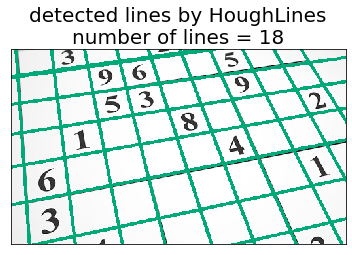

In [11]:
lines = cv2.HoughLines(edges,1,np.pi/180, 90)
lines = lines[:,0,:]
lines.shape

lines = opt(lines)
lines = np.unique(np.array(lines),axis = 0)

img = cv2.imread('Lines.jpg')
for rho,theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,170,120),3)
    
    plt.xticks([])
    plt.yticks([])
plt.title('detected lines by HoughLines\nnumber of lines = {}'.format(len(lines)),size = 20)
plt.imshow(img)
plt.savefig('p1.png')
plt.show()